<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r14_i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r14/4-fft-normal-n-0-6-9-15-r14.csv?token=AKVFSOBVODXSLZDHIBQ6O6264IGKA')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r14/4-fft-malicious-n-0-6-9-15-m-1-11-r14.csv?token=AKVFSOAMBA7TC7EFXEMZKRC64IGKG')


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [6]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,106,4,2,1,1,4,3,9,15,15,24,8,6,4,1,0.250000,8,17,1,17,17,8,24,3,27,1
1,128,4,2,1,1,4,3,9,15,15,24,8,9,4,1,0.250000,8,22,1,22,22,8,36,3,27,0
2,222,3,2,1,1,4,3,9,15,15,22,6,10,3,1,0.333333,8,16,2,17,32,6,40,3,27,1
3,244,3,2,1,1,4,3,9,15,15,22,6,15,3,1,0.333333,8,21,2,22,42,6,60,3,27,0
4,416,4,2,1,1,4,3,9,15,15,21,5,18,4,1,0.250000,8,15,3,17,45,8,72,3,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118502,3279028,3,2,5,2,2,3,9,15,15,22,6,60217,3,1,0.333333,15,5,2,6,10,6,1204340,15,135,0
118503,3279035,3,2,5,3,2,3,9,15,15,22,6,60217,3,1,0.333333,22,4,3,6,12,6,1806510,15,135,0
118504,3279042,3,2,5,4,2,3,9,15,15,22,6,60217,3,1,0.333333,29,3,4,6,12,6,2408680,15,135,0
118505,3279049,3,2,5,5,3,3,9,15,15,22,6,60217,3,1,0.333333,36,2,5,6,10,6,4516275,15,135,0


In [7]:
df.shape

(118507, 26)

Test Data

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r14/4-fft-malicious-n-0-6-9-15-m-1-12-r14.csv?token=AKVFSODULOIMM7C3BPSK5RK64IGKK')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r14/4-fft-malicious-n-0-6-9-15-m-1-7-r14.csv?token=AKVFSOFSHA3PGSE3JH2NAYK64IGKQ')
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r14/4-fft-malicious-n-0-6-9-15-m-11-12-r14.csv?token=AKVFSOELVZU2URT3BMUHD3K64IGKU')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r14/4-fft-malicious-n-0-6-9-15-m-7-11-r14.csv?token=AKVFSOFONKMF3HDQAUQZIFS64IGK2')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r14/4-fft-malicious-n-0-6-9-15-m-7-12-r14.csv?token=AKVFSOA3QNMERJDLARYJZXK64IGLA')

In [9]:
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(81579, 26)
(67140, 26)
(81285, 26)
(67289, 26)
(81724, 26)


Processing

In [10]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [12]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.240598,0.043128,0.007942,-0.011623,NaN,-0.034323,-0.002329,0.481312,-0.468394,-0.701187,-0.150000,-0.129479,-0.097659,-0.170846,-0.150662,0.654921,0.000948,0.043128,0.030225,0.074647
inport,-0.240598,1.000000,-0.013524,0.010656,-0.015594,NaN,-0.384821,0.081510,0.302280,0.618111,0.553382,0.224002,0.037620,-0.073243,-0.026795,-0.027398,0.551863,0.051923,-0.013524,-0.121973,-0.023392
cache_coherence_type,0.043128,-0.013524,1.000000,0.362424,-0.530397,NaN,-0.084099,0.055030,-0.024299,-0.132843,-0.202199,-0.436822,0.042257,0.000679,0.032295,0.028473,0.044172,0.337544,1.000000,0.959912,-0.021684
flit_id,0.007942,0.010656,0.362424,1.000000,-0.098183,NaN,-0.202651,0.016221,0.026031,0.009996,-0.015809,0.522706,-0.001794,-0.005097,-0.005183,0.002280,0.032061,0.693063,0.362424,0.299793,0.005828
flit_type,-0.011623,-0.015594,-0.530397,-0.098183,1.000000,NaN,0.296574,-0.023739,-0.038096,-0.014629,0.023136,0.454113,-0.078500,0.090447,0.008986,0.003504,-0.046920,0.059025,-0.530397,-0.438738,-0.008529
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,-0.034323,-0.384821,-0.084099,-0.202651,0.296574,NaN,1.000000,0.011326,-0.258240,-0.325179,-0.334706,-0.002849,0.005700,0.123883,0.097468,0.093524,-0.287268,-0.068626,-0.084099,0.190894,-0.050774
traversal_id,-0.002329,0.081510,0.055030,0.016221,-0.023739,NaN,0.011326,1.000000,0.008373,0.029378,0.008466,0.037702,0.162850,0.163738,0.245648,0.183158,0.064720,0.525398,0.055030,0.053624,-0.335554
hop_count,0.481312,0.302280,-0.024299,0.026031,-0.038096,NaN,-0.258240,0.008373,1.000000,0.360626,-0.146111,0.150602,-0.085417,-0.126956,-0.159740,-0.136210,0.589646,0.003392,-0.024299,-0.098434,0.024599
current_hop,-0.468394,0.618111,-0.132843,0.009996,-0.014629,NaN,-0.325179,0.029378,0.360626,1.000000,0.768612,0.344125,0.063044,-0.052409,0.007999,0.005334,0.013549,-0.011521,-0.132843,-0.215463,-0.029186


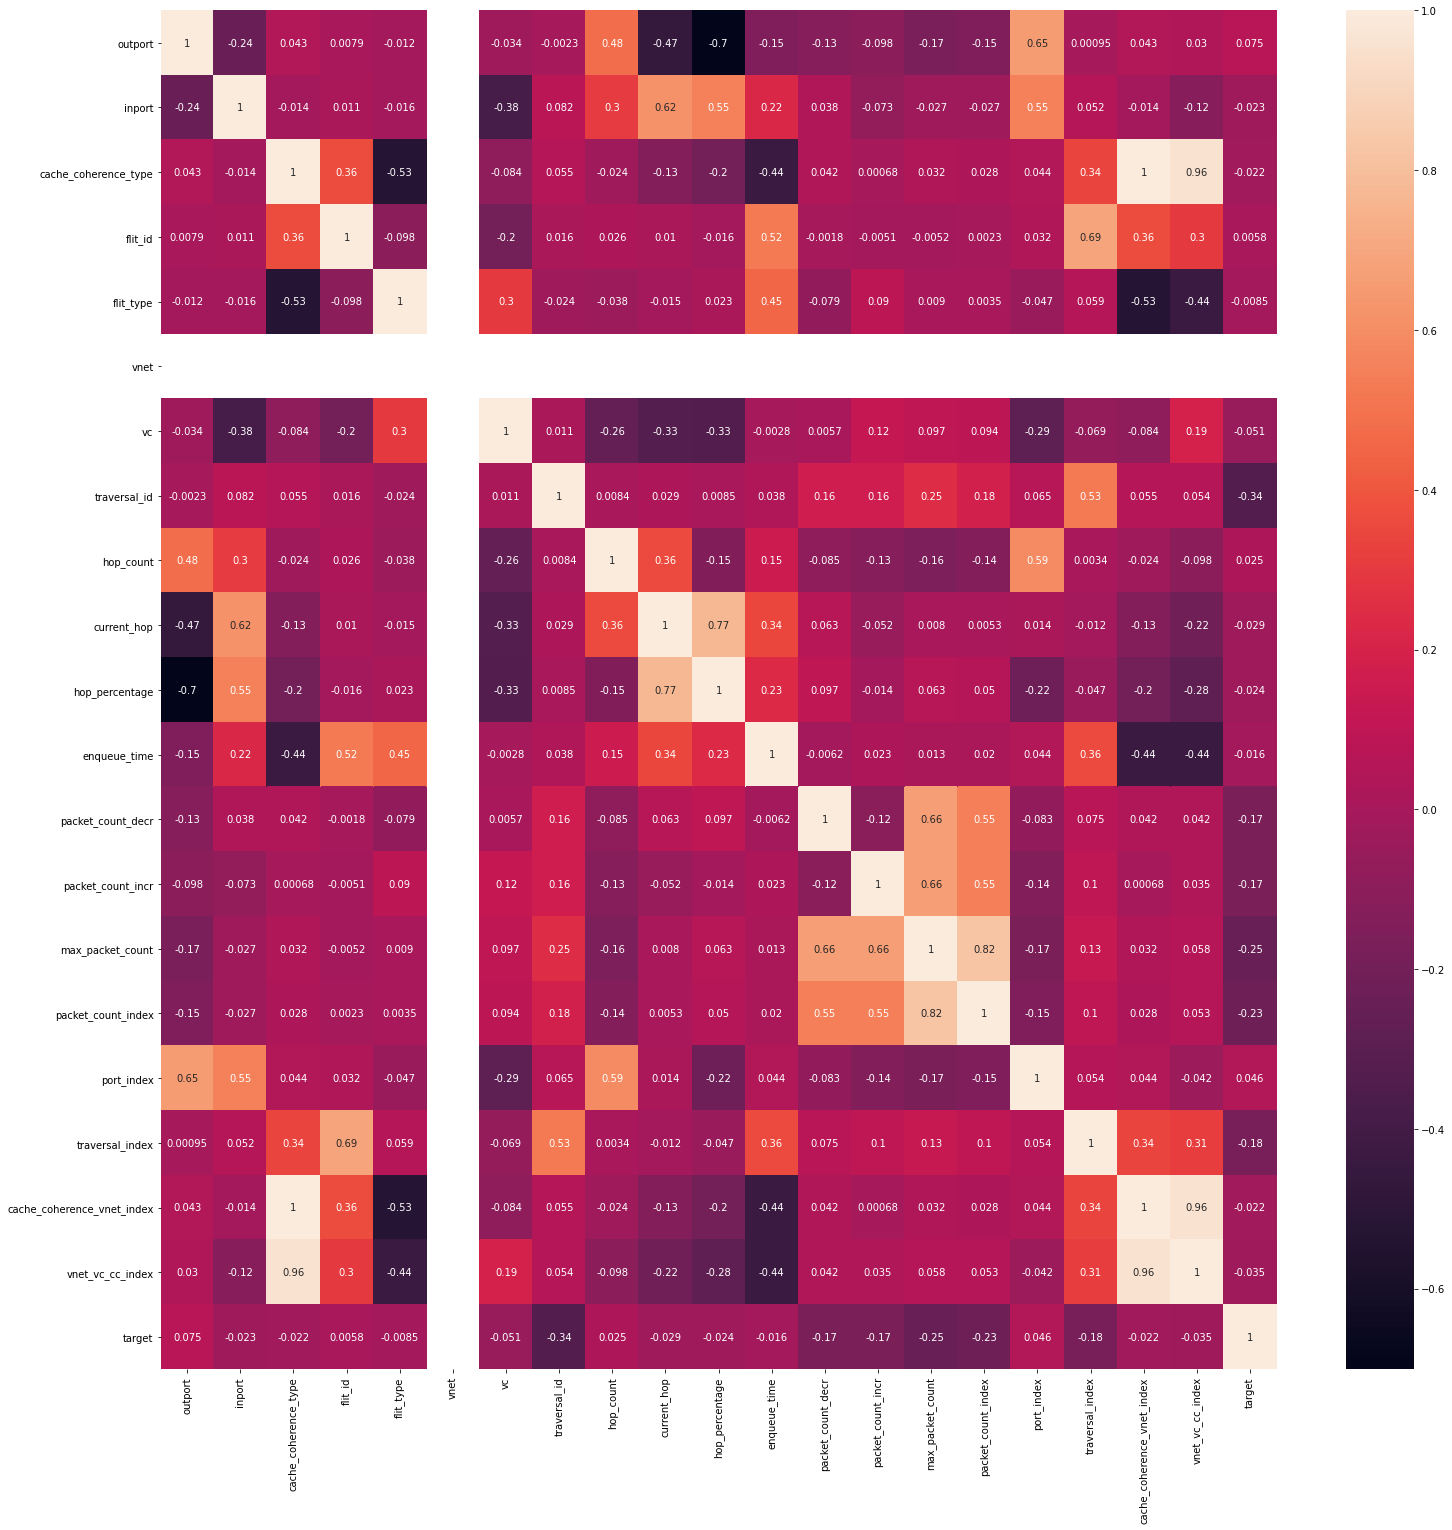

In [13]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [15]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'cache_coherence_type']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

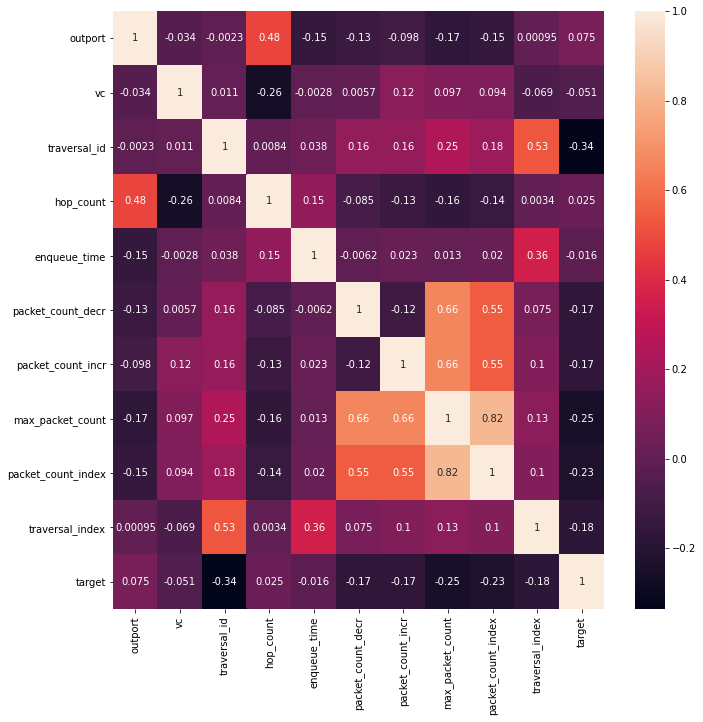

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

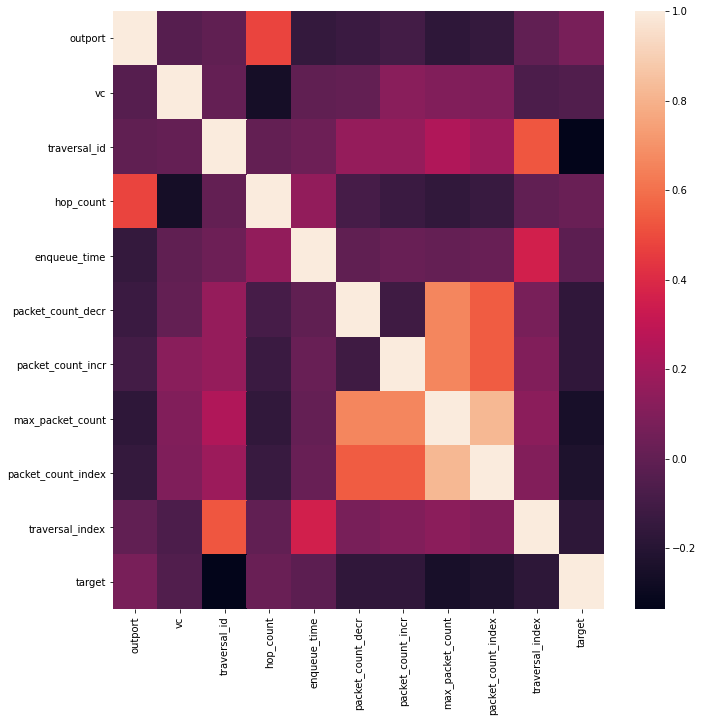

In [18]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [20]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.00,0.000000,0.000000,0.6,0.062500,0.10000,0.00000,0.10000,0.002439,0.000000
1,1.00,0.000000,0.000050,0.6,0.062500,0.13125,0.00000,0.13125,0.003201,0.000002
2,0.75,0.000000,0.000066,0.4,0.062500,0.09375,0.00625,0.10000,0.004726,0.000003
3,0.75,0.000000,0.000149,0.4,0.062500,0.12500,0.00625,0.13125,0.006250,0.000007
4,1.00,0.000000,0.000199,0.6,0.062500,0.08750,0.01250,0.10000,0.006707,0.000009
...,...,...,...,...,...,...,...,...,...,...
118502,0.75,0.000000,0.999983,0.4,0.171875,0.02500,0.00625,0.03125,0.001372,0.222248
118503,0.75,0.000000,0.999983,0.4,0.281250,0.01875,0.01250,0.03125,0.001677,0.333375
118504,0.75,0.000000,0.999983,0.4,0.390625,0.01250,0.01875,0.03125,0.001677,0.444501
118505,0.75,0.000000,0.999983,0.4,0.500000,0.00625,0.02500,0.03125,0.001372,0.833443


In [21]:
train_X[train_X.duplicated()].shape

(1, 10)

In [22]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df3['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.50,0.000000,0.000000,0.8,0.088889,0.153846,0.000000,0.153846,0.003846,0.000000
1,1.00,0.000000,0.000050,0.6,0.044444,0.147436,0.006410,0.153846,0.007532,0.000002
2,0.75,0.000000,0.000149,0.4,0.044444,0.141026,0.012821,0.153846,0.010897,0.000007
3,0.75,0.000000,0.000232,0.6,0.088889,0.134615,0.019231,0.153846,0.013942,0.000010
4,1.00,0.000000,0.000332,0.6,0.044444,0.128205,0.025641,0.153846,0.016667,0.000015
...,...,...,...,...,...,...,...,...,...,...
81574,0.75,0.000000,0.999983,0.4,0.122222,0.025641,0.173077,0.198718,0.022276,0.222249
81575,0.75,0.000000,0.999983,0.4,0.200000,0.019231,0.179487,0.198718,0.018429,0.333375
81576,0.75,0.000000,0.999983,0.4,0.277778,0.012821,0.185897,0.198718,0.014263,0.444501
81577,0.75,0.000000,0.999983,0.4,0.355556,0.006410,0.192308,0.198718,0.009776,0.833443


In [23]:
test_X1 = df4.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df4['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [24]:
test_X2 = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df5['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [25]:
test_X3 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df6['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [26]:
test_X4 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df7['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [28]:
train_Y = df['target']
train_Y.value_counts()

0    67066
1    51441
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  1338.771727
8  packet_count_index   550.447463
7    max_packet_count   538.083757
9     traversal_index   481.242886
5   packet_count_decr   272.111491
6   packet_count_incr   265.990666
1                  vc    95.198401
0             outport    81.780787
3           hop_count     5.594171
4        enqueue_time     1.775615


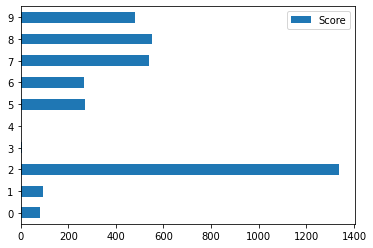

In [31]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [36]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.98109547979193
Test Prediction Score 98.21264191469777


In [37]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 79.81588398975227
Test Prediction Score 81.43282692880548
Test Prediction Score 80.3333948452974
Test Prediction Score 80.4069015738085
Test Prediction Score 80.04502961186432


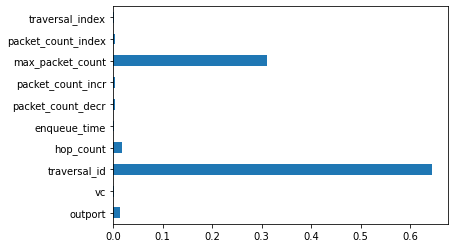

In [38]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

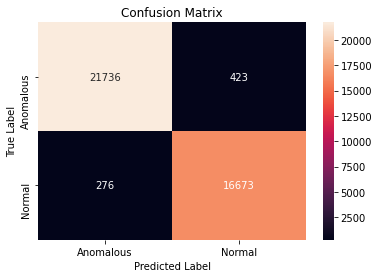

In [39]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [40]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     22159
           1       0.98      0.98      0.98     16949

    accuracy                           0.98     39108
   macro avg       0.98      0.98      0.98     39108
weighted avg       0.98      0.98      0.98     39108



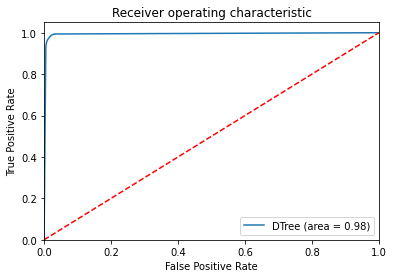

In [41]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [43]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r14l-i3.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [46]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.69060038866728


In [47]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 80.88233491462263
Test Prediction Score 83.17098599940424
Test Prediction Score 81.26468598142338
Test Prediction Score 82.59596665131002
Test Prediction Score 81.54642455092751


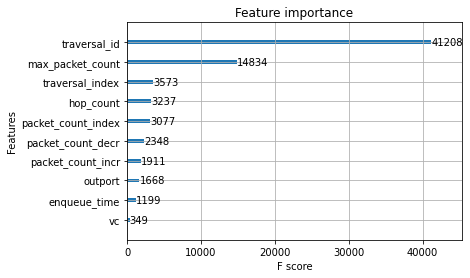

In [48]:
plot_importance(xgbc)
plt.show()

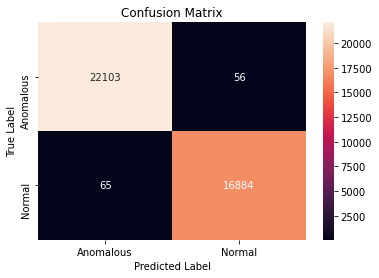

In [49]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [50]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22159
           1       1.00      1.00      1.00     16949

    accuracy                           1.00     39108
   macro avg       1.00      1.00      1.00     39108
weighted avg       1.00      1.00      1.00     39108



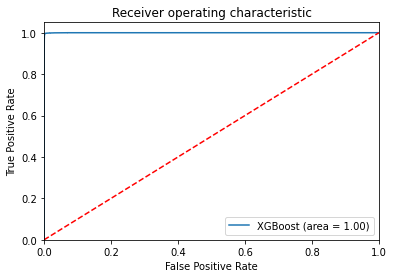

In [51]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()